### Topic:  Classification

**Settings:  Where applicable, use test_size=.30, random_state=4444.  This will permit comparison of results across users.

###  Data

**Challenges 1-10**: congressional votes [Congressional Voting Records Dataset](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)

These are votes of U.S. House of Representatives Congressmen on 16 key issues in 1984.

Read the description of the fields and download the data: house-votes-84.data

We will try to see if we can predict the house members' party based on their votes.

We will also use some of the general machine learning tools we learned (a bit more efficiently this time).

**Challenge 11**: movie data

**Challenge 12**: breast cancer surgery [Haberman Survival Dataset](https://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival)

In [1]:
import pandas as pd
import numpy as np

import operator
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

### Challenge 1

Load the data into a pandas dataframe. Replace 'y's with 1s, 'n's with 0s.

Now, almost every representative has a ?. This represents the absence of a vote (they were absent or some other similar reason). If we dropped all the rows that had a ?, we would throw out most of our data. Instead, we will replace ? with the best guess in the Bayesian sense: in the absence of any other information, we will say that the probability of the representative saying YES is the ratio of others that said YES over the whole votes.

So, convert each ? to this probability (when yes=1 and no=0, this is the mean of the column)

In [2]:
votes = pd.read_csv('../../../chi17_ds1/challenges/challenges_data/house-votes-84.data',
                    header=None)

In [3]:
votes.replace('n', 0, inplace=True)
votes.replace('y', 1, inplace=True)
votes.replace('?', np.NaN, inplace=True)

In [4]:
votes.replace('democrat.', 'democrat', inplace=True)
votes.replace('republican.', 'republican', inplace=True)

In [5]:
for column in votes.columns:
    if np.dtype(votes[column]) != 'object':
        votes[column].fillna(votes[column].mean(), inplace=True)

In [6]:
#pickle objects
def make_pickle(obj, filename):
    with open(filename, 'wb') as picklefile:
        pickle.dump(obj, picklefile)

In [7]:
make_pickle(votes, 'data/votes.pkl')

### Challenge 2

Split the data into a test and training set.

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = votes
y = X.pop(16)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4444)

### Challenge 3

Using scikit.learn's KNN algorithm, train a model that predicts the party (republican/democrat):

```
from sklearn.neighbors import KNeighborsClassifier
```

Try it with a lot of different k values (number of neighbors), from 1 to 20, and on the test set calculate the accuracy (number of correct predictions / number of all predictions) for each k

You can use this to calculate accuracy:

```
from sklearn.metrics import accuracy_score
```

Which k value gives the highest accuracy?

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [12]:
k = list(range(1,21))
scores = {}
for _k in k:
    knn = KNeighborsClassifier(n_neighbors=_k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores[_k] = accuracy_score(y_test, y_pred)

In [13]:
scores

{1: 0.9007633587786259,
 2: 0.89312977099236646,
 3: 0.9007633587786259,
 4: 0.9007633587786259,
 5: 0.91603053435114501,
 6: 0.93129770992366412,
 7: 0.91603053435114501,
 8: 0.92366412213740456,
 9: 0.93129770992366412,
 10: 0.93129770992366412,
 11: 0.92366412213740456,
 12: 0.92366412213740456,
 13: 0.92366412213740456,
 14: 0.92366412213740456,
 15: 0.92366412213740456,
 16: 0.92366412213740456,
 17: 0.92366412213740456,
 18: 0.91603053435114501,
 19: 0.91603053435114501,
 20: 0.91603053435114501}

In [14]:
max_k = max(scores.iteritems(), key=operator.itemgetter(1))[0]
max_k, scores[max_k]

(6, 0.93129770992366412)

In [15]:
knn = GridSearchCV(KNeighborsClassifier(), {'n_neighbors': k}, scoring = 'accuracy', cv=5)
knn.fit(X, y)
knn.grid_scores_

/Users/evaward/anaconda/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.93333, std: 0.04397, params: {'n_neighbors': 1},
 mean: 0.94253, std: 0.02460, params: {'n_neighbors': 2},
 mean: 0.93333, std: 0.03817, params: {'n_neighbors': 3},
 mean: 0.94253, std: 0.03029, params: {'n_neighbors': 4},
 mean: 0.93333, std: 0.02978, params: {'n_neighbors': 5},
 mean: 0.93333, std: 0.02367, params: {'n_neighbors': 6},
 mean: 0.92874, std: 0.03351, params: {'n_neighbors': 7},
 mean: 0.93103, std: 0.02528, params: {'n_neighbors': 8},
 mean: 0.92414, std: 0.03299, params: {'n_neighbors': 9},
 mean: 0.92874, std: 0.02876, params: {'n_neighbors': 10},
 mean: 0.92874, std: 0.03374, params: {'n_neighbors': 11},
 mean: 0.92414, std: 0.03900, params: {'n_neighbors': 12},
 mean: 0.92414, std: 0.03900, params: {'n_neighbors': 13},
 mean: 0.92184, std: 0.03603, params: {'n_neighbors': 14},
 mean: 0.92414, std: 0.03900, params: {'n_neighbors': 15},
 mean: 0.92644, std: 0.03701, params: {'n_neighbors': 16},
 mean: 0.92414, std: 0.04277, params: {'n_neighbors': 17},
 mean:

In [16]:
knn.best_params_, knn.best_score_

({'n_neighbors': 2}, 0.94252873563218387)

### Challenge 4

Make a similar model but with `LogisticRegression` instead, and calculate test accuracy.

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
logreg = LogisticRegression(random_state=4444)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
logreg_score = accuracy_score(y_test, y_pred)
logreg_score

0.93893129770992367

### Challenge 5

Make a bar graph of democrats and republicans. How many of each are there?

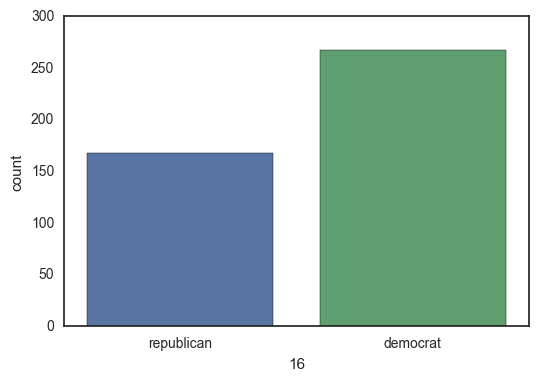

In [19]:
sns.countplot(y);

Make a very simple predictor that predicts 'democrat' for every incoming example.

Just make a function that takes in an X --an array or matrix with input examples--, and returns an array of the same length as X, where each value is 'democrat'. For example, if X is three rows, your function should return ['democrat','democrat','democrat']. Make a y_predicted vector using this and measure its accuracy.

Do the same with predicting 'republican' all the time and measure its accuracy.

In [20]:
def dumb_pred(X, prediction, dtype):
    y_pred = np.empty(len(X), dtype=dtype)
    y_pred.fill(prediction)
    return y_pred

In [21]:
y_pred_dem = dumb_pred(X, 'democrat', object)
dem_only_score = accuracy_score(y, y_pred_dem)
dem_only_score

0.61379310344827587

In [22]:
y_pred_rep = dumb_pred(X, 'republican', object)
rep_only_score = accuracy_score(y, y_pred_rep)
rep_only_score

0.38620689655172413

### Challenge 6

Plot the accuracies as a function of k. Since k only matters for KNN, your logistic regression accuracy, 'democrat' predictor accuracy and 'republican' predictor accuracy will stay the same over all k, so each of these three will be a horizontal line. But the KNN accuracy will change with k.

In [23]:
k = range(1,21)
knn_scores = knn.cv_results_['mean_test_score']

In [24]:
def scores_for_plot(score):
    scores = np.empty(len(k))
    scores.fill(score)
    return scores

In [25]:
logreg_scores = scores_for_plot(logreg_score)
dem_only_scores = scores_for_plot(dem_only_score)
rep_only_scores = scores_for_plot(rep_only_score)

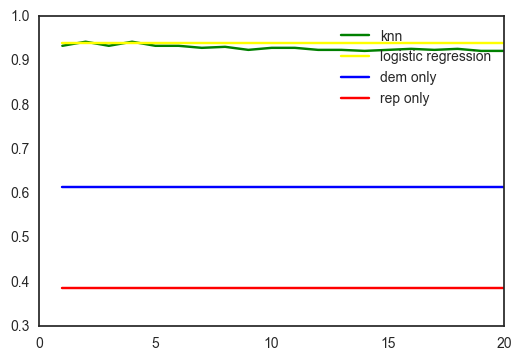

In [26]:
fig, ax = plt.subplots(1,1)
ax.plot(k, knn_scores, label = 'knn', color='green')
ax.plot(k, logreg_scores, label='logistic regression', color='yellow')
ax.plot(k, dem_only_scores, label='dem only', color='blue')
ax.plot(k, rep_only_scores, label='rep only', color='red')
ax.legend(loc='upper right');

### Challenge 7

Plot a learning curve for the logistic regression model. But instead of going through the painstaking steps of doing it yourself, use this function:

```
from sklearn.learning_curve import learning_curve
```

This will give you the m, training errors and testing errors. All you need to do is plot them. You don't even need to give it separate training/test sets. It will do crossvalidation all by itself. Easy, isn't it? : ) Remember, since it does cross-validation, it doesn't have a single training error or test error per m value. Instead, it has one for each fold (separate partition) of the cross validation. A good idea is to take the mean of these errors from different folds. This gives you a meaningful single number per m. What I mean is that doing something like:

```
train_cv_err = np.mean(train_err, axis=1)
test_cv_err = np.mean(ts_err, axis=1)
```

Before plotting `m` vs `train_cv_err` and `m` vs `test_cv_err`, where `train_err` and `test_err` are the vectors returned by the learning curve function. The `np.mean(...., axis=1)` means take the mean along axis 1 (axis 1 is the columns axis-- for each row, you have a bunch of columns, each corresponding to a cross validation fold, you are averaging these columns for each row).

Draw the learning curve for KNN with the best k value as well.

In [27]:
from sklearn.model_selection import learning_curve

In [28]:
def avg_cv_scores(m, train_scores, test_scores):
    avg_train_scores = []
    avg_test_scores = []
    for i, _m in enumerate(m):
        avg_train_scores.append(np.mean(train_scores[i]))
        avg_test_scores.append(np.mean(test_scores[i]))
    return avg_train_scores, avg_test_scores

In [29]:
m, train_scores, test_scores = learning_curve(logreg, X, y, cv=5)
logreg_train_scores, logreg_test_scores = avg_cv_scores(m, train_scores, test_scores)

In [30]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

m, train_scores, test_scores = learning_curve(knn, X, y, cv=5)
knn_train_scores, knn_test_scores = avg_cv_scores(m, train_scores, test_scores)

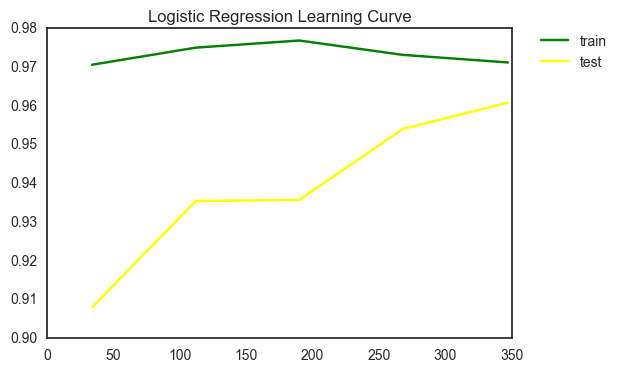

In [31]:
fig, ax = plt.subplots(1,1)
ax.plot(m, logreg_train_scores, label = 'train', color='green')
ax.plot(m, logreg_test_scores, label='test', color='yellow')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
ax.set_title('Logistic Regression Learning Curve');

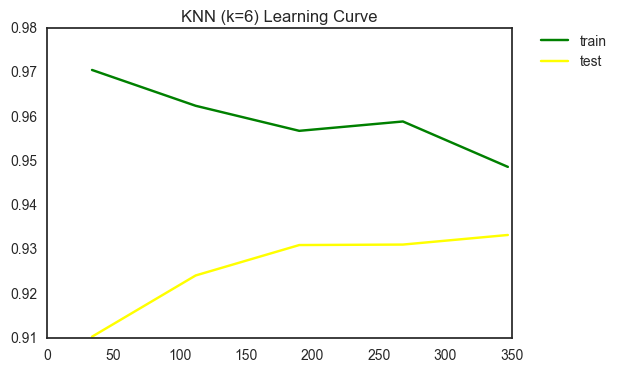

In [32]:
fig, ax = plt.subplots(1,1)
ax.plot(m, knn_train_scores, label = 'train', color='green')
ax.plot(m, knn_test_scores, label='test', color='yellow');
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
ax.set_title('KNN (k=6) Learning Curve');

### Challenge 8

This is a preview of many other classification algorithms that we will go over. Scikit.learn has the same interface for all of these, so you can use them exactly the same way as you did LogisticRegression and KNeighborsClassifier. Use each of these to classify your data and print the test accuracy of each:

Gaussian Naive Bayes
```
from sklearn.naive_bayes import GaussianNB

```

In [33]:
def get_acc_score(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return model, accuracy_score(y_test, y_pred)

In [34]:
from sklearn.naive_bayes import GaussianNB

In [35]:
nb = GaussianNB()
nb, nb_acc = get_acc_score(nb)
nb_acc

0.93893129770992367

SVM (Support Vector Machine) Classifier
```
from sklearn.svm import SVC
```

In [36]:
from sklearn.svm import SVC

In [37]:
svm = SVC(random_state=4444, probability=True)
svm, svm_acc = get_acc_score(svm)
svm_acc

0.95419847328244278

Decision Tree
```
from sklearn.tree import DecisionTreeClassifier
```

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
decisiontree = DecisionTreeClassifier(random_state=4444)
dt, dt_acc = get_acc_score(decisiontree)
dt_acc

0.93893129770992367

Random Forest
```
from sklearn.ensemble import RandomForestClassifier
```

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
randomforest = RandomForestClassifier(random_state=4444)
rf, rf_acc = get_acc_score(randomforest)
rf_acc

0.95419847328244278

### Challenge 9

There is actually a way to do cross validation quickly to get your accuracy results for an algorithm, without separating training and test yourself:
```
from sklearn.cross_validation import cross_val_score
```
Just like the `learning_curve` function, this takes a classifier object, `X` and `Y`. Returns accuracy (or whatever score you prefer by using the scoring keyword argument). Of course, it will return a score for each cross validation fold, so to get the generalized accuracy, you need to take the mean of what it returns.

Use this function to calculate the cross validation score of each of the classifiers you tried before.

In [42]:
from sklearn.model_selection import cross_val_score

In [43]:
classifiers = {'logreg': logreg,
               'knn': knn,
               'nb': nb,
               'svm': svm,
               'decisiontree': dt,
               'randomforest': rf}

In [44]:
for name, classifier in classifiers.items():
    cv_score = np.mean(cross_val_score(classifier, X, y, cv=5, scoring='accuracy'))
    filename = 'data/' + name + '.pkl'
    make_pickle(classifier, filename)
    print name, ':', cv_score

knn : 0.93332604311
svm : 0.953965274234
randomforest : 0.960783456052
logreg : 0.958483997959
decisiontree : 0.935439600496
nb : 0.940144224928


### Challenge 10

Instead of 'democrat' or 'republican', can you predict the vote of a representative based on their other votes?

Reload the data from scratch. Convert y-->1, n-->0.

Choose one vote. Build a classifier (logistic regression or KNN), that uses the other votes (do not use the party as a feature) to predict if the vote will be 1 or 0.

Convert each ? to the mode of the column (if a senator has not voted, make their vote 1 if most others voted 1, make it 0 if most others voted 0).

Calculate the cross validation accuracy of your classifier for predicting how each representative will vote on the issue.

In [45]:
votes = pd.read_csv('../../../chi17_ds1/challenges/challenges_data/house-votes-84.data',
                    header=None)

votes.replace('n', 0, inplace=True)
votes.replace('y', 1, inplace=True)
votes.replace('?', np.NaN, inplace=True)

votes.replace('democrat.', 'democrat', inplace=True)
votes.replace('republican.', 'republican', inplace=True)

In [46]:
for column in votes.columns:
    if np.dtype(votes[column]) != 'object':
        votes[column].fillna(votes[column].mode()[0], inplace=True)

In [47]:
votes.drop(16, axis=1, inplace=True)

In [48]:
votes.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
2,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0


In [49]:
X = votes
y = X.pop(15)

In [50]:
logreg = LogisticRegression(random_state=4444)
cv_score = np.mean(cross_val_score(logreg, X, y, cv=5, scoring='accuracy'))
cv_score

0.82526852324366362

### Challenge 11

Back to movie data! Choose one categoric feature to predict. I chose MPAA Rating, but genre, month, etc. are all decent choices. If you don't have any non-numeric features, you can make two bins out of a numeric one (like "Runtime>100 mins" and "Runtime<=100 mins")

In [72]:
import datetime as dt
from sklearn import preprocessing

In [73]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

file_path = '../../../chi17_ds1/challenges/challenges_data/2013_movies.csv'
movies = pd.read_csv(file_path,
                    parse_dates = ['ReleaseDate'],
                    date_parser = dateparse)

In [74]:
movies['Budget'].fillna(movies['Budget'].median(), inplace=True)

In [75]:
#drop useless features
movies.drop(['Title', 'Director'], axis=1, inplace=True)

In [76]:
#create dummy variables for categoricals
#for rating
rating_dummies = pd.get_dummies(movies['Rating'], drop_first=True)

#for release date quarter
movies['Quarter'] = movies['ReleaseDate'].dt.quarter
quarter_dummies = pd.get_dummies(movies['Quarter'], prefix='q', drop_first=True)

#for whether a movie is longer than 2 hours or not
movies.loc[movies['Runtime'] > 120, 'TwoHours'] = 1
movies['TwoHours'].fillna(0, inplace=True)
two_hr_dummies = pd.DataFrame(movies['TwoHours'])

In [77]:
#drop categoricals
movies.drop(['Rating', 'ReleaseDate', 'Quarter', 'Runtime', 'TwoHours'], axis=1, inplace=True)

In [78]:
movies.head()

,Budget,DomesticTotalGross
0,130000000.0,424668047
1,200000000.0,409013994
2,150000000.0,400738009
3,76000000.0,368061265
4,225000000.0,291045518


In [79]:
#standardize numericals
columns = movies.columns
movies = pd.DataFrame(preprocessing.scale(movies))
movies.columns = columns

In [80]:
movies.head()

,Budget,DomesticTotalGross
0,1.023994,3.726741
1,2.272224,3.546723
2,1.380631,3.451551
3,0.061074,3.075777
4,2.718020,2.190114


In [81]:
#add dummy variables back
for dummy in [rating_dummies, quarter_dummies, two_hr_dummies]:
    movies = movies.merge(dummy, left_index=True, right_index=True)

Make a bar graph of how many of each movie there is in the data. For example, with Ratings, show how many G, PG, PG-13, R movies there are, etc. (basically a histogram of your labels).

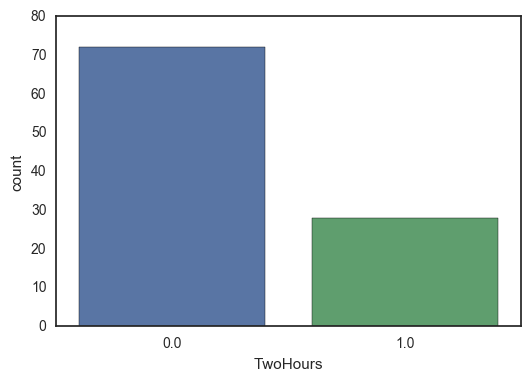

In [82]:
sns.countplot(movies['TwoHours']);

Predict your outcome variable (labels) using KNN and logistic regression. Calculate their accuracies.

In [83]:
X = movies
y = movies.pop('TwoHours')

In [84]:
make_pickle(X, 'data/movies_X.pkl')
make_pickle(y, 'data/movies_y.pkl')

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4444)

k = range(1,21)
scores = {}
for _k in k:
    knn = KNeighborsClassifier(n_neighbors=_k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores[_k] = accuracy_score(y_test, y_pred)
    
max_k = max(scores.iteritems(), key=operator.itemgetter(1))[0]
max_k, scores[max_k]

(7, 0.76666666666666672)

In [64]:
logreg = LogisticRegression(random_state=4444)
logreg.fit(X_train, y_train)
cv_score = np.mean(cross_val_score(logreg, X, y, cv=5, scoring='accuracy'))
cv_score

0.71293233082706764

In [65]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
cv_score = np.mean(cross_val_score(knn, X, y, cv=5, scoring='accuracy'))
cv_score

0.73949874686716799

Make a baseline stupid predictor that always predicts the label that is present the most in the data. Calculate its accuracy on a test set.

In [69]:
dumb_y_pred = dumb_pred(X, y.mode()[0], float)
accuracy_score(y, y_pred)

0.71999999999999997

How much better do KNN and logistic regression do versus the baseline?

> KNN (k=7) has an accuracy of 74%, logistic regression has an accuracy of 71% and the baseline predictor has an accuracy of 72%. Fascinating!

What are the coefficients of logistic regression? Which features affect the outcome how?

In [ ]:
X.columns

In [ ]:
logreg.coef_

### Challenge 12

Now you are a classification master. The representative votes dataset only had 0s and 1s. Let's just swiftly tackle the breast cancer surgery data.

Get it from here: [Haberman Survival Dataset](https://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival)

Attribute Information:

1. Age of patient at time of operation (numerical) 
2. Patient's year of operation (year - 1900, numerical) 
3. Number of positive axillary nodes detected (numerical) 
4. Survival status (class attribute) 
    * 0 = the patient died within 5 year
    * 1 = the patient survived 5 years or longer 

In [85]:
cancer = pd.read_csv('../../../chi17_ds1/challenges/challenges_data/haberman.data',
                     header=None)

In [86]:
cancer.columns = ['age', 'year', 'nodes', 'survived']

In [87]:
cancer.loc[cancer['survived'] == 2, 'survived'] = 0

What is the average and standard deviation of the age of all of the patients?

In [88]:
cancer['age'].mean()

52.45751633986928

In [89]:
cancer['age'].std()

10.80345234930328

What is the average and standard deviation of the age of those patients that survived 5 or more years after surgery?

In [90]:
cancer[cancer['survived'] == 1]['age'].mean()

52.01777777777778

In [91]:
cancer[cancer['survived'] == 1]['age'].std()

11.012154179929546

What is the average and standard deviation of the age of those patients who survived fewer than 5 years after surgery?

In [92]:
cancer[cancer['survived'] == 0]['age'].mean()

53.67901234567901

In [93]:
cancer[cancer['survived'] == 1]['age'].std()

11.012154179929546

Plot a histogram of the ages side by side with a histogram of the number of axillary nodes.

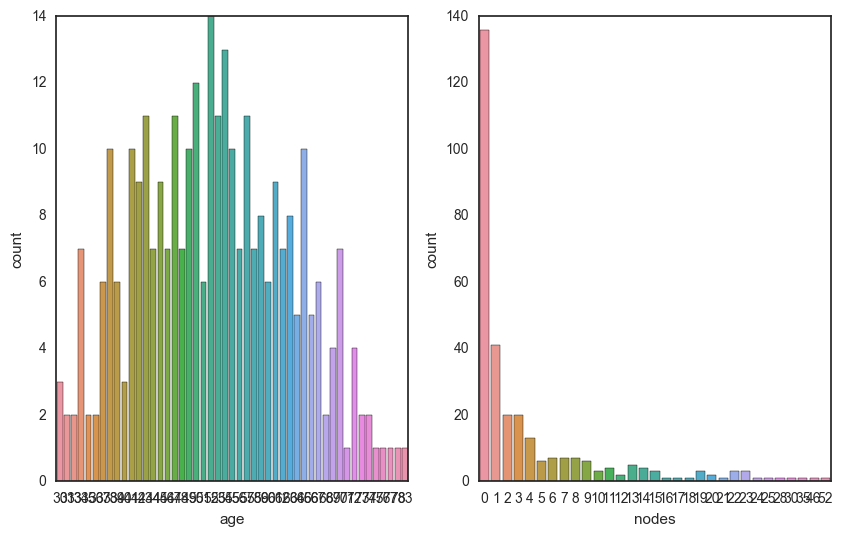

In [94]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
sns.countplot(cancer['age'], ax=ax[0])
sns.countplot(cancer['nodes'], ax=ax[1]);

What is the earliest year of surgery in this dataset?

In [95]:
cancer['year'].min() + 1900

1958

What is the most recent year of surgery?

In [96]:
cancer['year'].max() + 1900

1969

Use logistic regression to predict survival after 5 years. How well does your model do?

In [97]:
X = cancer
y = cancer.pop('survived')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4444)

In [100]:
make_pickle(X, 'data/cancer_X.pkl')
make_pickle(y, 'data/cancer_y.pkl')

In [98]:
logreg = LogisticRegression(random_state=4444)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
accuracy_score(y_pred, y_test)

0.81521739130434778

In [99]:
make_pickle(logreg, 'data/cancer_logreg.pkl')

What are the coefficients of logistic regression? Which features affect the outcome how?

In [ ]:
X.columns

In [ ]:
logreg.coef_

Draw the learning curve for logistic regression in this case.

In [ ]:
m, train_scores, test_scores = learning_curve(logreg, X, y, cv=5)
logreg_train_scores, logreg_test_scores = avg_cv_scores(m, train_scores, test_scores)

fig, ax = plt.subplots(1,1)
ax.plot(m, logreg_train_scores, label = 'train', color='green')
ax.plot(m, logreg_test_scores, label='test', color='yellow')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
ax.set_title('Logistic Regression Learning Curve');